이 자료는 위키독스 딥 러닝을 이용한 자연어 처리 입문의 네거티브 샘플링 구현하기 튜토리얼입니다.  

링크 : https://wikidocs.net/69141  

2021년 10월 14일에 마지막으로 테스트되었습니다.

# 1. 20뉴스그룹 데이터 전처리하기

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.datasets import fetch_20newsgroups
from tensorflow.keras.preprocessing.text import Tokenizer

In [2]:
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
documents = dataset.data
print('총 샘플 수 :',len(documents))

총 샘플 수 : 11314


In [3]:
# 전처리를 진행해봅시다. 불필요한 토큰을 제거하고, 소문자화를 통해 정규화를 진행합니다.

news_df = pd.DataFrame({'document':documents})
# 특수 문자 제거
news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")
# 길이가 3이하인 단어는 제거 (길이가 짧은 단어 제거)
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
# 전체 단어에 대한 소문자 변환
news_df['clean_doc'] = news_df['clean_doc'].apply(lambda x: x.lower())

<ipython-input-3-cd0d5a710198>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  news_df['clean_doc'] = news_df['document'].str.replace("[^a-zA-Z]", " ")


In [4]:
news_df.head()

,document,clean_doc
0,Well i'm not sure about the story nad it did s...,well sure about story seem biased what disagre...
1,"\n\n\n\n\n\n\nYeah, do you expect people to re...",yeah expect people read actually accept hard a...
2,Although I realize that principle is not one o...,although realize that principle your strongest...
3,Notwithstanding all the legitimate fuss about ...,notwithstanding legitimate fuss about this pro...
4,"Well, I will have to change the scoring on my ...",well will have change scoring playoff pool unf...


In [5]:
# 현재 데이터프레임에 Null 값이 있는지 확인합니다.
news_df.isnull().values.any()

False

In [7]:
# 빈 값(empy) 유무도 확인해야 합니다. 모든 빈 값을 Null 값으로 변환
news_df.replace("", float("NaN"), inplace=True)

In [8]:
# 다시 Null 값이 있는지 확인합니다.
news_df.isnull().values.any()

True

In [9]:
# Null 값을 제거합니다.
news_df.dropna(inplace=True)

In [10]:
print(len(news_df))

10995


In [12]:
# NLTK에서 정의한 불용어 리스트를 사용하여 불용어를 제거합니다.
import nltk   # add
nltk.download('stopwords')  # add

stop_words = stopwords.words('english') # NLTK로부터 불용어를 받아옵니다.
tokenized_doc = news_df['clean_doc'].apply(lambda x: x.split()) # 토큰화

# 불용어를 제거합니다.
tokenized_doc = tokenized_doc.apply(lambda x: [item for item in x if item not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
tokenized_doc = tokenized_doc.to_list()

In [14]:
# 단어가 1개 이하인 경우 중심 단어, 주변 단어가 존재하지 않으므로 불가.
drop_train = [index for index, sentence in enumerate(tokenized_doc) if len(sentence) <= 1]

In [15]:
print(drop_train)

[44, 260, 353, 1651, 1839, 2321, 2336, 2371, 2862, 2963, 3290, 3387, 3395, 3396, 3421, 3563, 3591, 3713, 3874, 3897, 4180, 4524, 4587, 4617, 4947, 4970, 5129, 5525, 6015, 6227, 6652, 6723, 6883, 7080, 7956, 8000, 8156, 8212, 8283, 8588, 8867, 8903, 9045, 9555, 9696, 10439, 10447, 10564, 10707, 10730, 10750, 10838, 10896, 10908, 10967]


In [16]:
# 단어가 1개 이하인 샘플의 인덱스를 찾아서 저장하고, 해당 샘플들은 제거.
tokenized_doc = np.delete(tokenized_doc, drop_train, axis=0)

/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


In [17]:
print(len(tokenized_doc))

10940


In [18]:
# 단어 집합을 생성하고, 정수 인코딩을 진행합니다.
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

word2idx = tokenizer.word_index
idx2word = {value : key for key, value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)

In [21]:
# 상위 2개의 샘플을 출력해봅시다.
print(encoded[:2])

[[9, 59, 603, 207, 3278, 1495, 474, 702, 9470, 13686, 5533, 15227, 702, 442, 702, 70, 1148, 1095, 1036, 20294, 984, 705, 4294, 702, 217, 207, 1979, 15228, 13686, 4865, 4520, 87, 1530, 6, 52, 149, 581, 661, 4406, 4988, 4866, 1920, 755, 10668, 1102, 7837, 442, 957, 10669, 634, 51, 228, 2669, 4989, 178, 66, 222, 4521, 6066, 68, 4295], [1026, 532, 2, 60, 98, 582, 107, 800, 23, 79, 4522, 333, 7838, 864, 421, 3825, 458, 6488, 458, 2700, 4730, 333, 23, 9, 4731, 7262, 186, 310, 146, 170, 642, 1260, 107, 33568, 13, 985, 33569, 33570, 9471, 11491]]


In [22]:
# 단어 집합의 크기를 확인합니다.
vocab_size = len(word2idx) + 1
print('단어 집합의 크기 :', vocab_size)

단어 집합의 크기 : 64277


# 네거티브 샘플링을 통한 데이터셋 구성하기

In [23]:
# 네거티브 샘플링을 위해서 케라스에서 제공하는 전처리 도구인 skipgrams를 사용합니다.
from tensorflow.keras.preprocessing.sequence import skipgrams

In [24]:
# 어떤 전처리가 수행되는지 그 결과를 확인하기 위해서 (꽤 시간이 소요되는 작업이므로)
# 상위 10개의 뉴스그룹 샘플에 대해서만 수행해봅시다.

# 네거티브 샘플링
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:10]]

# 10개의 뉴스그룹 샘플에 대해서 모두 수행되었지만, 첫번째 뉴스그룹 샘플에 대해서만 확인해보겠습니다.
# 첫번째 샘플인 skip_grams[0] 내 skipgrams로 형성된 데이터셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]
for i in range(5):
    print("({:s} ({:d}), {:s} ({:d})) -> {:d}".format(
          idx2word[pairs[i][0]], pairs[i][0],
          idx2word[pairs[i][1]], pairs[i][1],
          labels[i]))

(commited (7837), justifible (32504)) -> 0
(media (702), adeos (25140)) -> 0
(look (66), hover (24435)) -> 0
(shame (4988), reason (149)) -> 1
(commited (7837), austria (4866)) -> 1


In [25]:
print(len(skip_grams))

10


In [26]:
# 첫번째 뉴스그룹 샘플에 대해서 생긴 pairs와 labels의 개수
print(len(pairs))
print(len(labels))

2220
2220


In [27]:
# 위의 작업을 모든 뉴스그룹 샘플에 대해서 수행합니다. (3분 정도 소요)
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded]

# 2. Skip-Gram with Negative Sampling(SGNS) 구현하기

In [28]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input
from tensorflow.keras.layers import Dot
from tensorflow.keras.utils import plot_model
from IPython.display import SVG

In [29]:
# 하이퍼파라미터인 임베딩 벡터의 차원은 100으로 정함
embedding_dim = 100

In [30]:
# 두 개의 임베딩 층을 추가합니다.
# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1, ), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

# 주변 단어를 위한 임베딩 테이블
c_inputs = Input(shape=(1, ), dtype='int32')
context_embedding  = Embedding(vocab_size, embedding_dim)(c_inputs)

In [31]:
# 각 임베딩 테이블은 중심 단어와 주변 단어 각각을 위한 임베딩 테이블이며,
# 각 단어는 임베딩 테이블을 거쳐서 내적을 수행하고,
# 내적의 결과는 1 또는 0을 예측하기 위해서 시그모이드 함수를 활성화 함수로 거쳐 최종 예측값을 얻습니다.

dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_product = Reshape((1,), input_shape=(1, 1))(dot_product)
output = Activation('sigmoid')(dot_product)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, 1)]                  0         []                            
                                                                                                  
 embedding (Embedding)       (None, 1, 100)               6427700   ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, 1, 100)               6427700   ['input_2[0][0]']             
                                                                                              

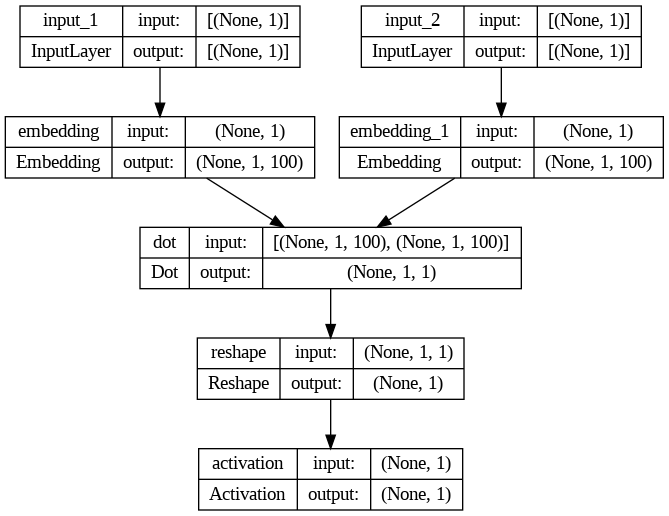

In [32]:
model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam')
plot_model(model, to_file='skip_gram.png', show_shapes=True, show_layer_names=True, rankdir='TB')

In [33]:
# 모델의 학습은 5에포크 수행 (주의!!: 시간이 상당히 소요됨)
for epoch in range(1, 6):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X,Y)
    print('Epoch :',epoch, 'Loss :',loss)

KeyboardInterrupt: ignored

# 3. 결과 확인하기

In [ ]:
import gensim

In [ ]:
# 학습된 임베딩 벡터들을 vector.txt에 저장합니다.
f = open('vectors.txt' ,'w')
f.write('{} {}\n'.format(vocab_size-1, embedding_dim))
vectors = model.get_weights()[0]
for word, i in tokenizer.word_index.items():
    f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

In [ ]:
# 저장된 임베딩 벡터를  gensim의 models.KeyedVectors.load_word2vec_format()으로 로드하면
# 쉽게 단어 벡터 간 유사도를 구할 수 있습니다.
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [ ]:
w2v.most_similar(positive=['disease'])

[('infection', 0.6822181940078735),
 ('patients', 0.6786915063858032),
 ('diseases', 0.6778280138969421),
 ('yeast', 0.637976348400116),
 ('lyme', 0.6234785318374634),
 ('lesions', 0.62334144115448),
 ('treat', 0.6229036450386047),
 ('nerve', 0.6226518750190735),
 ('quack', 0.6102176308631897),
 ('chronic', 0.6035628318786621)]

In [ ]:
w2v.most_similar(positive=['soldiers'])

[('wounded', 0.7870566248893738),
 ('hamas', 0.780727744102478),
 ('slaughter', 0.778682291507721),
 ('massacred', 0.7761104702949524),
 ('palestinians', 0.7727225422859192),
 ('villages', 0.7700804471969604),
 ('shelling', 0.7644733190536499),
 ('occupation', 0.7623903751373291),
 ('terrorist', 0.7594828009605408),
 ('killed', 0.7571672201156616)]

In [ ]:
w2v.most_similar(positive=['police'])

[('officers', 0.5940332412719727),
 ('demand', 0.5538086295127869),
 ('investigation', 0.5475316047668457),
 ('permit', 0.5427597761154175),
 ('homes', 0.5251521468162537),
 ('intifada', 0.5153162479400635),
 ('switzerland', 0.5054680109024048),
 ('handguns', 0.5039469003677368),
 ('funds', 0.49640247225761414),
 ('treasury', 0.49368804693222046)]

In [ ]:
w2v.most_similar(positive=['hero'])

[('evident', 0.6241123676300049),
 ('treasury', 0.622967004776001),
 ('exercised', 0.6084901094436646),
 ('delegated', 0.6084328889846802),
 ('bloodshed', 0.605443000793457),
 ('restitution', 0.6043845415115356),
 ('gross', 0.6000478863716125),
 ('intervened', 0.5970805883407593),
 ('dashnaks', 0.594544529914856),
 ('verbally', 0.594032347202301)]

In [ ]:
w2v.most_similar(positive=['engine'])

[('wheel', 0.5794666409492493),
 ('honda', 0.5051121711730957),
 ('metal', 0.48657843470573425),
 ('pickup', 0.48521116375923157),
 ('smaller', 0.4837951362133026),
 ('front', 0.4800146818161011),
 ('brake', 0.4778139591217041),
 ('steering', 0.4674001634120941),
 ('shafts', 0.46222877502441406),
 ('rebuilt', 0.4620116949081421)]

In [ ]:
w2v.most_similar(positive=['doctor'])

[('pain', 0.6648697853088379),
 ('migraine', 0.632205605506897),
 ('prescription', 0.6129752397537231),
 ('spite', 0.5851105451583862),
 ('doctors', 0.5646334290504456),
 ('disease', 0.5567648410797119),
 ('mild', 0.5515984296798706),
 ('treatment', 0.5462743043899536),
 ('chronic', 0.5447998046875),
 ('quack', 0.5412765741348267)]